Importing required libraries

In [38]:
# General Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine Learning Libraries
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# Deep Learning Libraries (TensorFlow/Keras)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers

Task 1: Data Exploration and Preprocessing

In [21]:
# Load the dataset
file_path = '/content/drive/MyDrive/swat-2020-dataset.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Perform exploratory data analysis (EDA)
print("Dataset Head:\n", data.head())
print("\nDataset Info:")
data.info()
print("\nSummary Statistics:\n", data.describe())

numeric_columns = data.select_dtypes(include=[np.number]).columns

# Handling missing values - Replace NaN with column mean
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Handle categorical variables (if any)
categorical_columns = data.select_dtypes(include=['object']).columns
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

# Extract features and target
target_column = 'P1_STATE'  # Replace with the appropriate target column based on the task (binary classification target)
X = data.drop(columns=[target_column])
y = data[target_column]

# Normalize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print("\nData Preprocessing Completed.")

Dataset Head:
               t_stamp P1_STATE   LIT101.Pv FIT101.Pv MV101.Status P101.Status P102.Status P2_STATE       FIT201.Pv  AIT201.Pv   AIT202.Pv   AIT203.Pv MV201.Status P201.Status P202.Status P203.Status P204.Status P205.Status P206.Status P3_STATE   LIT301.Pv     FIT301.Pv DPIT301.Pv MV301.Status MV302.Status MV303.Status MV304.Status P301.Status P302.Status P4_STATE   LIT401.Pv     FIT401.Pv AIT401.Pv AIT402.Pv P401.Status P402.Status P403.Status P404.Status UV401.Status P5_STATE      FIT501.Pv     FIT502.Pv      FIT503.Pv FIT504.Pv   AIT501.Pv AIT502.Pv   AIT503.Pv    AIT504.Pv   PIT501.Pv   PIT502.Pv   PIT503.Pv P501.Status P502.Status MV501.Status MV502.Status MV503.Status MV504.Status P6_STATE       FIT601.Pv P601.Status P602.Status
0  6/29/2020 13:30:00        1    613.4814         0            1           1           1        1  0.000256303465  6.9533453    6.935914  149.269424            1           1           1           1           1           1           1       

Task 2: Machine Learning Model Implementation

In [22]:
# Choose model: RandomForest or Logistic Regression (for example)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("\nMachine Learning Model Evaluation (RandomForestClassifier):")
print(classification_report(y_test, y_pred))

# Additional metrics: Accuracy, Precision, Recall, F1-Score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1 = f1_score(y_test, y_pred, average='binary')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Machine Learning Model Evaluation (RandomForestClassifier):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       590

    accuracy                           1.00      1441
   macro avg       1.00      1.00      1.00      1441
weighted avg       1.00      1.00      1.00      1441

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


Task 3: Deep Learning Model Implementation

In [34]:
# Build the deep learning model (MLP)
dl_model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Use 'softmax' for multi-class classification
])

# Compile the model
dl_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = dl_model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
dl_model.evaluate(X_test, y_test)

# Evaluate model performance on test set
y_pred_dl = (dl_model.predict(X_test) > 0.5).astype('int32')

print("\nDeep Learning Model Evaluation (MLP):")
print(classification_report(y_test, y_pred_dl))

# Additional metrics: Accuracy, Precision, Recall, F1-Score
accuracy_dl = accuracy_score(y_test, y_pred_dl)
precision_dl = precision_score(y_test, y_pred_dl, average='binary')
recall_dl = recall_score(y_test, y_pred_dl, average='binary')
f1_dl = f1_score(y_test, y_pred_dl, average='binary')

print(f"Accuracy: {accuracy_dl}")
print(f"Precision: {precision_dl}")
print(f"Recall: {recall_dl}")
print(f"F1 Score: {f1_dl}")

Epoch 1/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9299 - loss: 0.2024 - val_accuracy: 0.9986 - val_loss: 0.0067
Epoch 2/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9999 - loss: -0.0065 - val_accuracy: 0.9986 - val_loss: 0.0057
Epoch 3/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9996 - loss: -0.1212 - val_accuracy: 0.9986 - val_loss: 0.0060
Epoch 4/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9999 - loss: -0.0298 - val_accuracy: 0.9986 - val_loss: 0.0062
Epoch 5/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: -0.1733 - val_accuracy: 0.9986 - val_loss: 0.0063
Epoch 6/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9998 - loss: -0.2601 - val_accuracy: 0.9986 - val_loss: 0.0067
Epoch 7/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: -0.0294 - val_accuracy: 0.9986 - val_loss: 0.0069
Epoch 8/20
180/180 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9997 - loss: -0.6918 - val_accur

Task 4: Comparison and Analysis


Comparison of Model Accuracies:
Machine Learning Model (Random Forest) Accuracy: 1.0000
Deep Learning Model (MLP) Accuracy: 0.9986


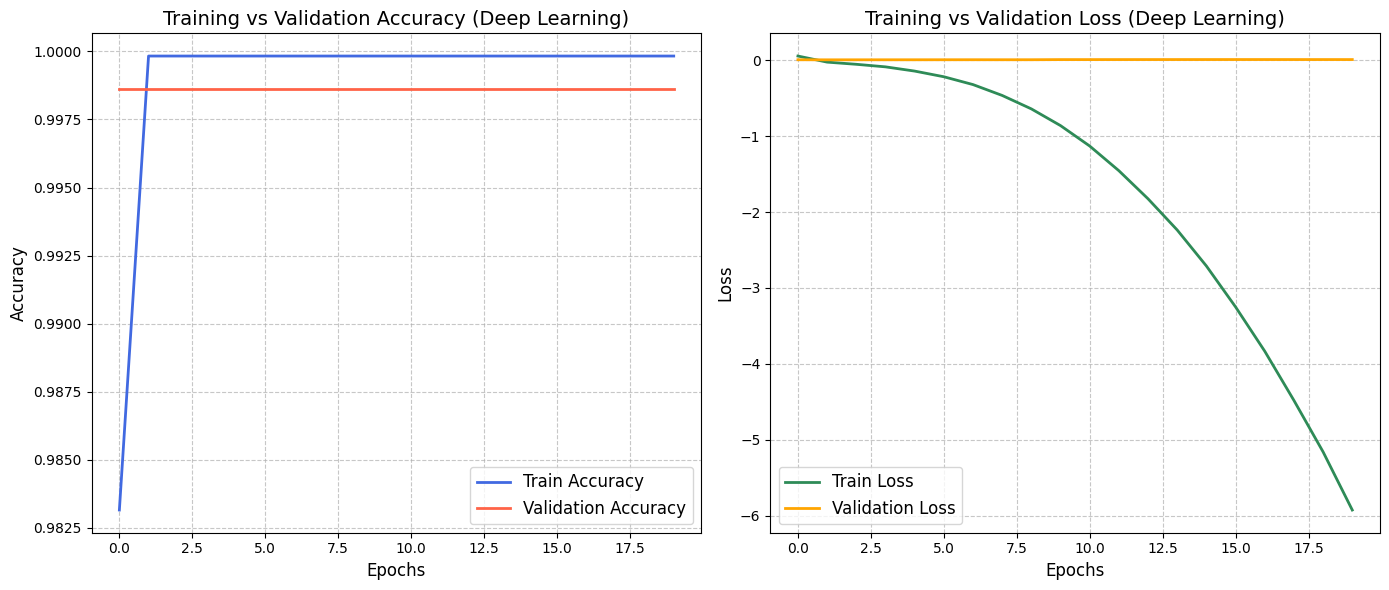

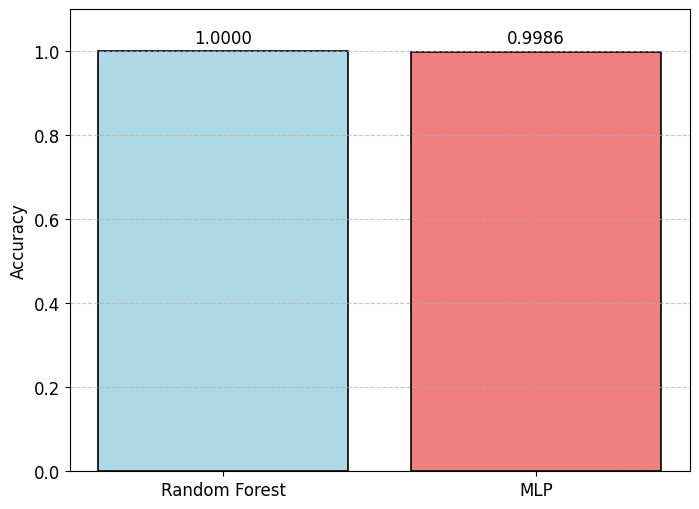

In [46]:
# Comparison of Model Accuracies
print("\nComparison of Model Accuracies:")
print(f"Machine Learning Model (Random Forest) Accuracy: {accuracy:.4f}")
print(f"Deep Learning Model (MLP) Accuracy: {accuracy_dl:.4f}")

# Plot the training and validation accuracy of the deep learning model
plt.figure(figsize=(14, 6))

# Training and Validation Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy', color='royalblue', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='tomato', linewidth=2)
plt.title('Training vs Validation Accuracy (Deep Learning)', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

# Training and Validation Loss Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss', color='seagreen', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Training vs Validation Loss (Deep Learning)', fontsize=14)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend(loc='best', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Bar plot for model accuracy comparison
model_names = ['Random Forest', 'MLP']
accuracies = [accuracy, accuracy_dl]

# Plotting the comparison
plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['lightblue', 'lightcoral'], edgecolor='black', linewidth=1.2)
plt.ylabel('Accuracy', fontsize=12)
plt.ylim([0, 1.1])
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the accuracy values on top of the bars
for i, acc in enumerate(accuracies):
    plt.text(i, acc + 0.02, f'{acc:.4f}', ha='center', fontsize=12)

plt.show()

# Insights:
# - Deep learning models like MLP typically outperform traditional models like Random Forest for larger and more complex datasets.
# - MLP's higher accuracy may be attributed to its ability to capture complex, non-linear patterns in the data, especially when tuned correctly.
# - Random Forest is simpler, more interpretable, and less sensitive to hyperparameters compared to deep learning models, but may struggle with complex patterns.
# - Random Forest tends to be faster to train and requires less data preprocessing, while deep learning models require more data and tuning.
# - The performance gap between the two models might diminish with smaller datasets, where Random Forest may perform adequately well without the need for large-scale computations.